# Canada's Mental Health Analysis

In this analysis, my team explored mental health data from Statistics Canada to examine the state of mental health among Canadians and identify ways to improve awareness of available services. This Jupyter notebook highlights my contributions to the project. I focused on analyzing the modes of communication Canadians use when discussing mental health issues, such as video calls, text messages, or in-person meetings. Additionally, I examined the frequency of consultations and the types of professionals involved, including nurses and family doctors.

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px

In [13]:
df = pd.read_csv("pumf.csv")

In [14]:
service_provider = df[["SR1_10AA", "SR1_10AB", "SR1_10AC", "SR1_10AD", "SR1_20AA", "SR1_20AB", "SR1_20AC", "SR1_20AD", "SR1_30AA", "SR1_30AB", "SR1_30AC", "SR1_30AD", "SR1_40AA", "SR1_40AB", "SR1_40AC", "SR1_50AA", "SR1_50AB", "SR1_50AC", "SR1_50AD"]]

#Replacing 6.0 with Valid_skip

service_provider = service_provider.replace(6.0, "Valid_skip")

#Replacing 1.0 with Yes

service_provider = service_provider.replace(1.0, "Yes")

#Replacing 2.0 with No

service_provider = service_provider.replace(2.0, "No")

#Replacing 9 with Not stated

service_provider = service_provider.replace(9.0, "Not_stated")

#Replacing 8 with Refusal:
service_provider = service_provider.replace(8.0, "Refusal")

#Replacing 7 with Don't know:
service_provider = service_provider.replace(7.0, "Don't_know")

First, we identified the necessary columns using the accompanying data dictionary. Each column begins with "SR1_" followed by a number and two letters. The numbers represent the mental health service providers that Canadians consulted: "10" for psychiatrists, "20" for family doctors, "30" for psychologists, "40" for nurses, and "50" for social workers. The last two letters indicate the mode of communication: "AA" stands for in-person, "AB" is for phone consultations, "AC" is for video calls, and "AD" is for text communication. The survey asked Canadians if they spoke with a wide variety of people regarding their mental health, including friends, family members, and co-workers/supervisors. However, for our analysis, we focused only on mental health professionals, as they possess the specialized knowledge and expertise necessary to address and treat mental health conditions. It’s important to note that the survey did not include a text option for nurses, so it is a zero in our analysis.

Next, we replaced each numeric value with its corresponding string representation. For instance, in the data dictionary, "6.0" indicated a "Valid skip." Instead of retaining "6.0" in the dataset, we substituted it with the string value. This change improved readability and enhanced our understanding of the data.



In [15]:
def df_extract(person, phone, video, text = None):
    inPerson = 0
    overVideo = 0
    overPhone = 0
    overText = 0

    for i in service_provider[person]:
        if i == "Yes":
            inPerson += 1
    
    for i in service_provider[phone]:
        if i == "Yes":
            overPhone += 1

    for i in service_provider[video]:
        if i == "Yes":
            overVideo += 1

    if text:
        for i in service_provider[text]:
            if i == "Yes":
                overText += 1

    provider = [inPerson, overPhone, overVideo, overText]
    
    return provider

In [16]:
psychiatrist = df_extract("SR1_10AA", "SR1_10AB", "SR1_10AC", "SR1_10AD")

print(psychiatrist)

family_doctor = df_extract("SR1_20AA", "SR1_20AB", "SR1_20AC", "SR1_20AD")

print(family_doctor)

psychologist = df_extract("SR1_30AA", "SR1_30AB", "SR1_30AC", "SR1_30AD")

print(psychologist)

social_worker = df_extract("SR1_50AA", "SR1_50AB", "SR1_50AC", "SR1_50AD")

print(social_worker)

nurse = df_extract("SR1_40AA", "SR1_40AB", "SR1_40AC")

print(nurse)

[118, 137, 84, 7]
[496, 448, 46, 16]
[128, 88, 157, 11]
[211, 191, 222, 21]
[71, 57, 12, 0]


We developed a function that accepts each column as a parameter and returns the total count of responses as a list. Using this function, we then extracted the responses for all five mental health service providers.

In [17]:
service_providers = {"Service Providers": ["Psychiatrist", "Family Doctor", "Psychologist", "Social Worker", "Nurse"], 
                     "Number of Respondents": [(psychiatrist[0] + psychiatrist[1] + psychiatrist[2] + psychiatrist[3]), 
                                               (family_doctor[0] + family_doctor[1] + family_doctor[2] + family_doctor[3]),
                                               (psychologist[0] + psychologist[1] + psychologist[2]+ psychologist[3]),
                                               (social_worker[0]+ social_worker[1] + social_worker[2] + social_worker[3]),
                                               (nurse[0] + nurse[1] + nurse[2] + nurse[3])]}

In [18]:
fig = px.bar(service_providers, x = "Service Providers", y = "Number of Respondents", labels = {"value":"Number of Respondents", "Service Provider": "Service Provider"}, title = 'Canadians Preferred Mental Health Serivce Providers', text_auto = True)
fig.show()

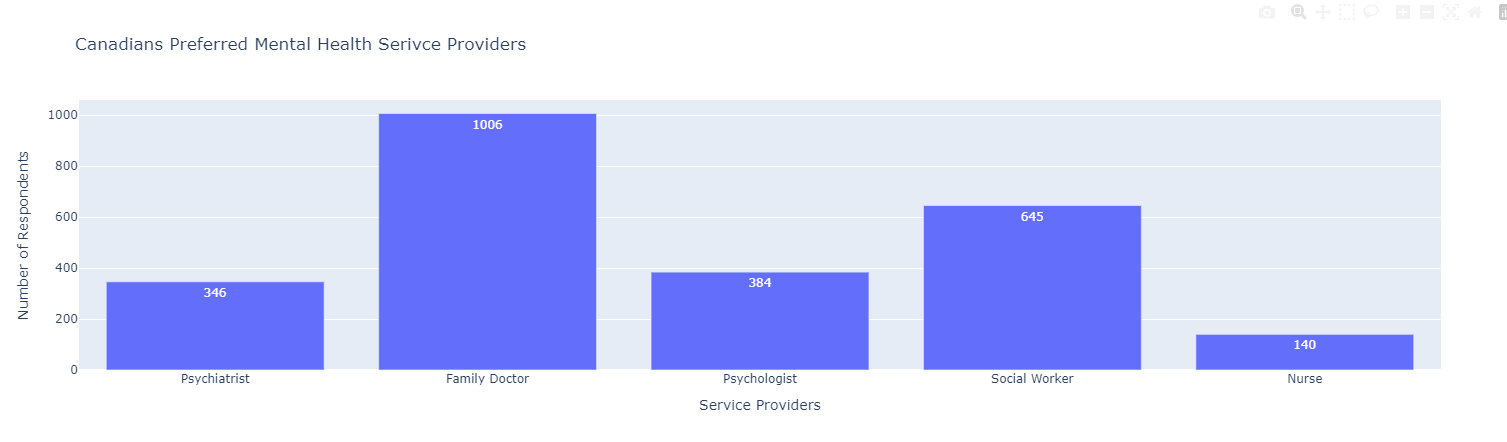

For guiding question 4, we decided to use bar charts for our visualization because they make it much easier to compare different populations.

Figure Q4.1 illustrates the total number of respondents who consulted a specific mental health service provider. The data shows that Canadians preferred to speak with a family doctor regarding their mental health issues, with 1,006 respondents reporting this choice. Social workers were the second most preferred service providers, followed by psychologists and psychiatrists. Nurses were the least preferred among the mental health service providers.

In [19]:
overall_com = {"Mode of Communication": ['In-person', 'Over-phone', 'Over-video', 'Over-text'],
               "Number of respondents": [(psychiatrist[0] + family_doctor[0] + psychologist[0] + social_worker[0] + nurse[0]), 
                                         (psychiatrist[1] + family_doctor[1] + psychologist[1] + social_worker[1] + nurse[1]), 
                                         (psychiatrist[2]+ family_doctor[2]+ psychologist[2] + social_worker[2] + nurse[2]), 
                                         (psychiatrist[3] + family_doctor[3] + psychologist[3] + social_worker[3] + nurse[3])]}

In [20]:
fig = px.bar(overall_com, x = "Mode of Communication", y = "Number of respondents", labels = {"value":"Number of Respondents", "Mode of Communication": "Mode of Communication"}, title = 'Canadians Overall Preferred Mode of Communication with Mental Health Serivce Providers', text_auto = True)
fig.show()

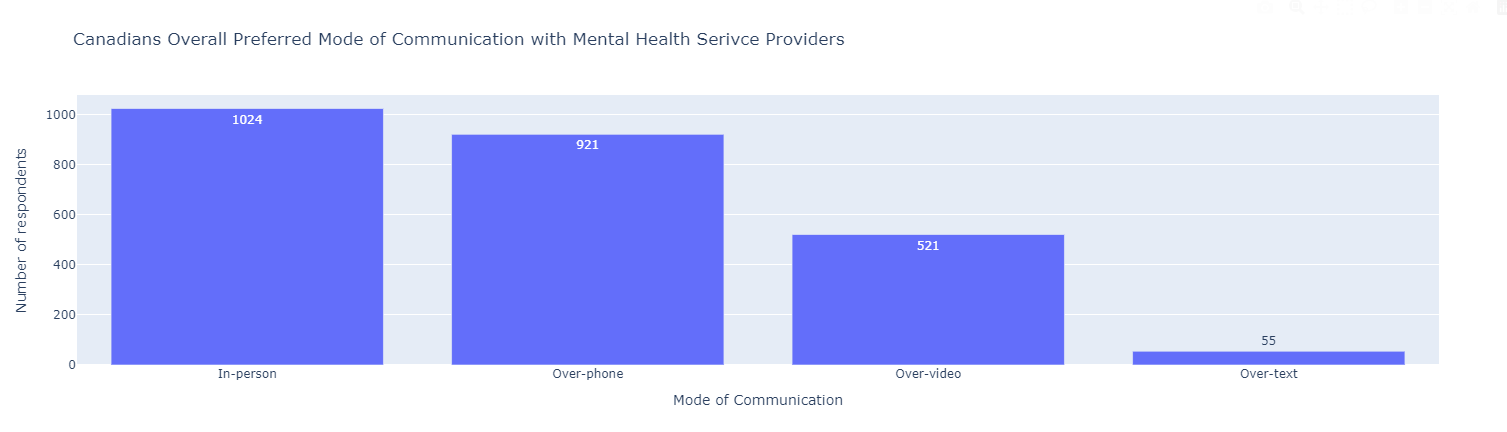

In [21]:
service_providers_com = {"Service Provider": ["Psychiatrist", "Family Doctor", "Psychologist", "Social Worker", "Nurse"], 
        "In-person": [psychiatrist[0], family_doctor[0], psychologist[0], social_worker[0], nurse[0]],
        "Over-phone": [psychiatrist[1], family_doctor[1], psychologist[1], social_worker[1], nurse[1]],
        "Over-video": [psychiatrist[2], family_doctor[2], psychologist[2], social_worker[2], nurse[2]],
        "Over-text": [psychiatrist[3], family_doctor[3], psychologist[3], social_worker[3], nurse[3]]}

In [22]:
fig = px.bar(service_providers_com, x = "Service Provider", y = ["In-person", "Over-phone", "Over-video", "Over-text"], barmode = 'group', labels = {"value":"Number of Respondents", "Service Provider": "Service Provider", "variable": "Mode of Communication"}, title = 'Canadians Preferred Modes of Communication with Mental Health Service Providers', text_auto = True)
fig.show()

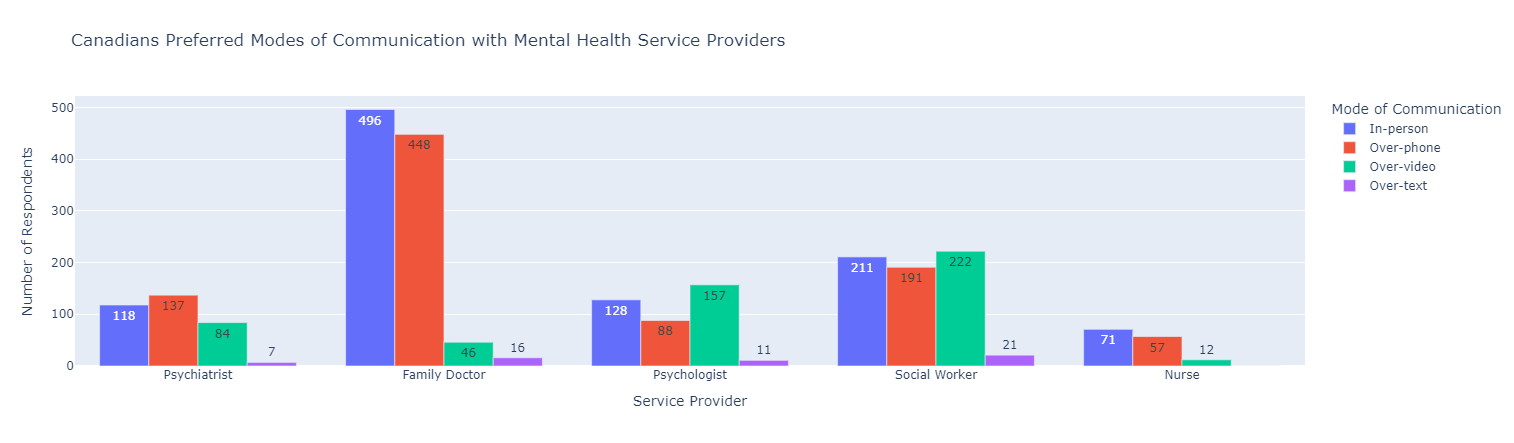

Figure Q4.2 examines how Canadians communicated with mental health service providers. The data shows that 1,024 respondents interacted with their service provider in person, while 921 respondents communicated via phone. In contrast, only 55 respondents chose to communicate through text, making it the least preferred method of communication among the four options available.

Figure Q4.3 provides a breakdown of communication preferences with mental health service providers. The figure shows that the majority of respondents prefer to speak with their family doctor either in person or over the phone. This trend is consistent across all service providers. However, when it comes to communication with social workers, many Canadians prefer video calls. 

In [23]:
frequency = df[['SR1G010', 'SR1G020', 'SR1G030', 'SR1G040', 'SR1G050']]

#Replacing 1.0 with 1 to 10 times

frequency = frequency.replace(1.0, "1 to 10 times")

#Replacing 2.0 with 11 to 25 times

frequency = frequency.replace(2.0, "11 to 25 times")

#Replacing 3.0 with 26 times or more

frequency = frequency.replace(3.0, "26 times or more")

#Replacing 6.0 with Valid_skip

frequency = frequency.replace(6.0, "Valid skip")

#Replacing 9.0 with Not stated

frequency = frequency.replace(9.0, "Not stated")

In [24]:
def frequency_extract(column):
    one_ten_times = 0
    eleven_twentyfive_times = 0
    twentysix_more_times = 0 

    for i in frequency[column]:
        if i == "1 to 10 times":
            one_ten_times += 1
        elif i == "11 to 25 times":
            eleven_twentyfive_times += 1
        elif i == "26 times or more":
            twentysix_more_times += 1

    number_of_consultation = [one_ten_times, eleven_twentyfive_times, twentysix_more_times]

    return number_of_consultation

In [25]:
psychiatrist_freq = frequency_extract("SR1G010")

print(psychiatrist_freq)

doctor_freq = frequency_extract("SR1G020")

print(doctor_freq)

psychologist_freq = frequency_extract('SR1G030')

print(psychologist_freq)

nurse_freq = frequency_extract('SR1G040')

print(nurse_freq)

sw_freq = frequency_extract('SR1G050')

print(sw_freq)

[215, 44, 12]
[761, 42, 8]
[224, 71, 24]
[107, 7, 7]
[349, 129, 38]


We examined the number of consultations Canadians had with their preferred mental health service provider. Using the data dictionary, we identified the relevant columns and replaced the numeric values with their corresponding string values. The responses were categorized into three groups: 1 to 10 times, 11 to 25 times, and 26 times or more. Each column reflects the number of times Canadians consulted a mental health service provider in the past 12 months. Similar to the previous data wrangling and cleaning process, we converted the numeric values to their string equivalents. Additionally, we created a function that extracts the frequency of each response and returns a list of these values.

In [26]:
overall_freq = {"Service Provider": ["Psychiatrist", "Family Doctor", "Psychologist", "Social Worker", "Nurse"],
                "1 to 10 times": [psychiatrist_freq[0], doctor_freq[0], psychologist_freq[0], sw_freq[0], nurse_freq[0]],
                "11 to 25 times": [psychiatrist_freq[1], doctor_freq[1], psychologist_freq[1], sw_freq[1], nurse_freq[1]],
                "26 or more times": [psychiatrist_freq[2], doctor_freq[2], psychologist_freq[2], sw_freq[2], nurse_freq[2]]}

In [27]:
fig = px.bar(overall_freq, x = "Service Provider", y = ["1 to 10 times", "11 to 25 times", "26 or more times"], barmode = 'group', labels = {"value":"Number of Respondents", "Service Provider": "Service Provider", "variable": "Number of Consultations"}, title = 'Number of Consultations with Mental Health Service Providers', text_auto = True)
fig.show()

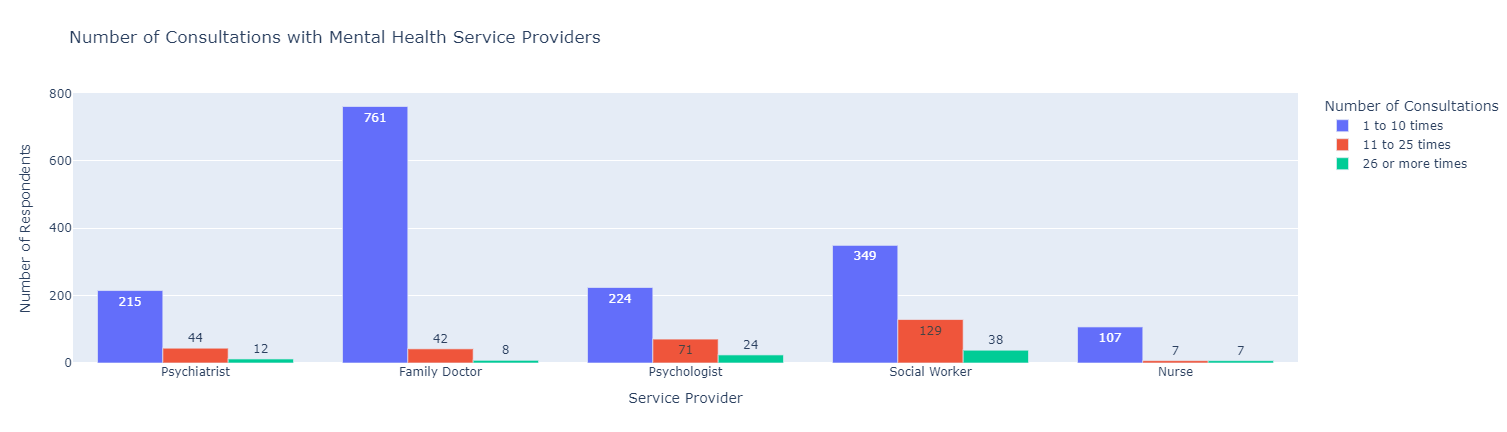

Figure Q4.4 examines the number of consultations with mental health service providers over the past 12 months. Overall, it shows that most Canadians had between 1 and 10 consultations. Only a small number had 11 or more consultations. Notably, among all service providers, social workers had the highest number of Canadians attending 11 or more consultations within that year.